In [829]:
# import all_insiders_combined as a pd DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [830]:
import pandas as pd

# Load the data
data_types = {
    'Name and Address': str,
    'Principal occupation if other than with Bank Holding Company': str,
    'Title and Position with Bank Holding Company': str,
    'Title and Position with Subsidiaries': str,
    'Title and Position with Other Businesses': str,
    'Percentage of Voting Shares in Bank Holding Company': str,
    'Percentage of Voting Shares in Subsidiaries': str,
    'List names of other companies if 25% or more of voting securities are held': str,
    'Bank Name': str,
    'table presence': str,
    'Bank_PDF-Name': str,
    'Year': str,
}

securities_data_types = {
    'Name and Address': str,
    'Bank Name': str,
    'Year': str,
    'Number and Percentage of Voting Stock': str,
}

# Columns to load
columns_to_load = list(data_types.keys())
securities_columns_to_load = list(securities_data_types.keys())

# Load CSVs
df = pd.read_csv(
    'all_insiders_combined.csv',
    dtype=data_types,
    usecols=columns_to_load
)

securities_df = pd.read_csv(
    'all_securities_combined.csv',
    dtype=securities_data_types,
    usecols=securities_columns_to_load
)

# Combine and drop exact duplicates on 'Name and Address'
combined_df = pd.concat([df, securities_df], ignore_index=True)

# Remove exact duplicates based on 'Name and Address'
combined_df = combined_df.drop_duplicates(subset=['Name and Address'], keep='first')

df = combined_df


In [831]:
df

,Name and Address,Principal occupation if other than with Bank Holding Company,Title and Position with Bank Holding Company,Title and Position with Subsidiaries,Title and Position with Other Businesses,Percentage of Voting Shares in Bank Holding Company,Percentage of Voting Shares in Subsidiaries,List names of other companies if 25% or more of voting securities are held,Bank Name,table presence,Bank_PDF-Name,Year,Number and Percentage of Voting Stock
0,"Douglass M Eberhardt II (1) Stockton, CA",NaN,"President, CEO and Chairman","President, CEO and Chairman",Member San Joaquin County Busines Council,19.99 %,NaN,NaN,Unknown,both,1867 Western Financial Corporation_Y-6_2020-12...,Unknown,NaN
1,"Timothy J Hachman Stockton, CA",Retired Attorney at Law,Director,"Director, Bank of Stockton","Timothy J Hachman, Attorney at Law, Owner Dire...",0.11 %,NaN,"Timothy J Hachman, Attorney at Law, 100%",Unknown,both,1867 Western Financial Corporation_Y-6_2020-12...,Unknown,NaN
2,"Gregory Bensch Stockton, Ca","Medical Doctor, Allergy Immunology Asthma Medi...",Director,"Director, Bank of Stockton",NaN,NaN,NaN,"Gregory Bensch MD, Inc 100% Bensch & Bensch Pr...",Unknown,both,1867 Western Financial Corporation_Y-6_2020-12...,Unknown,NaN
3,"Thomas H Shaffer Stockton, CA",NaN,Director,Director Bank of Stockton,NaN,0.24 %,NaN,NaN,Unknown,both,1867 Western Financial Corporation_Y-6_2020-12...,Unknown,NaN
4,"John F. Denton Stockton, CA",NaN,Chief Financial Officer,Chief Financial Officer,NaN,0.16 %,NaN,NaN,Unknown,both,1867 Western Financial Corporation_Y-6_2020-12...,Unknown,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64122,"Terry Halikias\nPalos Park, IL(USA)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,Unknown,"57,674 (9.79%)"
64123,"Alan LierzWheaton, KS, United States",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Republic Bancorp, Inc",NaN,NaN,2020,"2,717.97, 45.71%"
64124,"Perry SchremmerTopeka, KS, United States",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Republic Bancorp, Inc",NaN,NaN,2020,"350.00, 5.89%"
64125,"William G. McKenzieAlta Vista, KS, United States",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Republic Bancorp, Inc",NaN,NaN,2020,"1,139.71, 19.17%"


In [832]:
df

,Name and Address,Principal occupation if other than with Bank Holding Company,Title and Position with Bank Holding Company,Title and Position with Subsidiaries,Title and Position with Other Businesses,Percentage of Voting Shares in Bank Holding Company,Percentage of Voting Shares in Subsidiaries,List names of other companies if 25% or more of voting securities are held,Bank Name,table presence,Bank_PDF-Name,Year,Number and Percentage of Voting Stock
0,"Douglass M Eberhardt II (1) Stockton, CA",NaN,"President, CEO and Chairman","President, CEO and Chairman",Member San Joaquin County Busines Council,19.99 %,NaN,NaN,Unknown,both,1867 Western Financial Corporation_Y-6_2020-12...,Unknown,NaN
1,"Timothy J Hachman Stockton, CA",Retired Attorney at Law,Director,"Director, Bank of Stockton","Timothy J Hachman, Attorney at Law, Owner Dire...",0.11 %,NaN,"Timothy J Hachman, Attorney at Law, 100%",Unknown,both,1867 Western Financial Corporation_Y-6_2020-12...,Unknown,NaN
2,"Gregory Bensch Stockton, Ca","Medical Doctor, Allergy Immunology Asthma Medi...",Director,"Director, Bank of Stockton",NaN,NaN,NaN,"Gregory Bensch MD, Inc 100% Bensch & Bensch Pr...",Unknown,both,1867 Western Financial Corporation_Y-6_2020-12...,Unknown,NaN
3,"Thomas H Shaffer Stockton, CA",NaN,Director,Director Bank of Stockton,NaN,0.24 %,NaN,NaN,Unknown,both,1867 Western Financial Corporation_Y-6_2020-12...,Unknown,NaN
4,"John F. Denton Stockton, CA",NaN,Chief Financial Officer,Chief Financial Officer,NaN,0.16 %,NaN,NaN,Unknown,both,1867 Western Financial Corporation_Y-6_2020-12...,Unknown,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64122,"Terry Halikias\nPalos Park, IL(USA)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,Unknown,"57,674 (9.79%)"
64123,"Alan LierzWheaton, KS, United States",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Republic Bancorp, Inc",NaN,NaN,2020,"2,717.97, 45.71%"
64124,"Perry SchremmerTopeka, KS, United States",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Republic Bancorp, Inc",NaN,NaN,2020,"350.00, 5.89%"
64125,"William G. McKenzieAlta Vista, KS, United States",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Republic Bancorp, Inc",NaN,NaN,2020,"1,139.71, 19.17%"


In [833]:
# Convert 'Year' to int, handling 'Unknown' as NaN
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')  # NaN for 'Unknown'

In [834]:
# Remove the percentage sign and convert percentage columns to numeric
percentage_columns = [
    'Percentage of Voting Shares in Bank Holding Company',
    # 'Number and Percentage of Voting Stock'
]

# Filter percentage columns to be correct
for col in percentage_columns:
    df[col] = (
        df[col]
        .astype(str)
        .str.findall(r'(\d+(?:\.\d+)?)\s*%')       # Find all numbers followed by optional space and a %
        .apply(lambda matches: sum(map(float, matches)) if matches else 0.0)  # Convert to float, sum them
        .astype(float)
        .fillna(0.0)  # Fill NaN with 0.0
    )


In [835]:
# Convert any percentage of voting shares that are above 100 to nan

for col in percentage_columns:
    df[col] = df[col].where(df[col] < 100, np.nan)  # Set values above 100 to NaN

In [836]:
df

,Name and Address,Principal occupation if other than with Bank Holding Company,Title and Position with Bank Holding Company,Title and Position with Subsidiaries,Title and Position with Other Businesses,Percentage of Voting Shares in Bank Holding Company,Percentage of Voting Shares in Subsidiaries,List names of other companies if 25% or more of voting securities are held,Bank Name,table presence,Bank_PDF-Name,Year,Number and Percentage of Voting Stock
0,"Douglass M Eberhardt II (1) Stockton, CA",NaN,"President, CEO and Chairman","President, CEO and Chairman",Member San Joaquin County Busines Council,19.99,NaN,NaN,Unknown,both,1867 Western Financial Corporation_Y-6_2020-12...,NaN,NaN
1,"Timothy J Hachman Stockton, CA",Retired Attorney at Law,Director,"Director, Bank of Stockton","Timothy J Hachman, Attorney at Law, Owner Dire...",0.11,NaN,"Timothy J Hachman, Attorney at Law, 100%",Unknown,both,1867 Western Financial Corporation_Y-6_2020-12...,NaN,NaN
2,"Gregory Bensch Stockton, Ca","Medical Doctor, Allergy Immunology Asthma Medi...",Director,"Director, Bank of Stockton",NaN,0.00,NaN,"Gregory Bensch MD, Inc 100% Bensch & Bensch Pr...",Unknown,both,1867 Western Financial Corporation_Y-6_2020-12...,NaN,NaN
3,"Thomas H Shaffer Stockton, CA",NaN,Director,Director Bank of Stockton,NaN,0.24,NaN,NaN,Unknown,both,1867 Western Financial Corporation_Y-6_2020-12...,NaN,NaN
4,"John F. Denton Stockton, CA",NaN,Chief Financial Officer,Chief Financial Officer,NaN,0.16,NaN,NaN,Unknown,both,1867 Western Financial Corporation_Y-6_2020-12...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64122,"Terry Halikias\nPalos Park, IL(USA)",NaN,NaN,NaN,NaN,0.00,NaN,NaN,Unknown,NaN,NaN,NaN,"57,674 (9.79%)"
64123,"Alan LierzWheaton, KS, United States",NaN,NaN,NaN,NaN,0.00,NaN,NaN,"Republic Bancorp, Inc",NaN,NaN,2020.0,"2,717.97, 45.71%"
64124,"Perry SchremmerTopeka, KS, United States",NaN,NaN,NaN,NaN,0.00,NaN,NaN,"Republic Bancorp, Inc",NaN,NaN,2020.0,"350.00, 5.89%"
64125,"William G. McKenzieAlta Vista, KS, United States",NaN,NaN,NaN,NaN,0.00,NaN,NaN,"Republic Bancorp, Inc",NaN,NaN,2020.0,"1,139.71, 19.17%"


In [837]:
# Print max percentage of voting shares in bank holding company
max_percentage = df['Percentage of Voting Shares in Bank Holding Company'].max()
print(f'Max Percentage of Voting Shares in Bank Holding Company: {max_percentage:.2f}%')

Max Percentage of Voting Shares in Bank Holding Company: 99.98%


In [838]:
# Add up all the percentages for each grouped item

# Step 1: Group and sum the percentage columns
summed_df = (
    df.groupby(['Bank Name', 'Year'])[percentage_columns]
    .sum()
    .reset_index()
)

# Step 2: Add a new column with the total of all percentage columns
summed_df['Total Percentage Sum'] = summed_df[percentage_columns].sum(axis=1)

In [839]:
# If the percentage of voting shares in bank holding company is greater than 100, set it to 100
summed_df['Percentage of Voting Shares in Bank Holding Company'] = summed_df['Percentage of Voting Shares in Bank Holding Company'].clip(upper=100.0)


In [840]:
summed_df

,Bank Name,Year,Percentage of Voting Shares in Bank Holding Company,Total Percentage Sum
0,1867 Western Financial Corporation,2021.0,100.00,148.44
1,1889 Bancorp Mutual Holding Company,2022.0,0.00,0.00
2,"1889 Bancshares, Inc.",2019.0,100.00,155.42
3,1ST CAPITAL BANCORP,2021.0,12.09,12.09
4,"1st Jackson Bancshares, Inc.",2020.0,63.59,63.59
...,...,...,...,...
2380,"Upper Cumberland Bancshares, Inc.",2021.0,39.51,39.51
2381,"Virginia Community Capital, Inc.",2020.0,0.00,0.00
2382,"Volunteer State Bancshares, Inc",2021.0,0.00,0.00
2383,"Volunteer State Bancshares, Inc.",2020.0,0.00,0.00


In [841]:
# Drop rows where 'Total Percentage Sum' is NaN or less than 0 or greater than 100
summed_df = summed_df.dropna(subset=['Total Percentage Sum'])
summed_df = summed_df[summed_df['Total Percentage Sum'] >= 0]
summed_df = summed_df[summed_df['Total Percentage Sum'] <= 100]

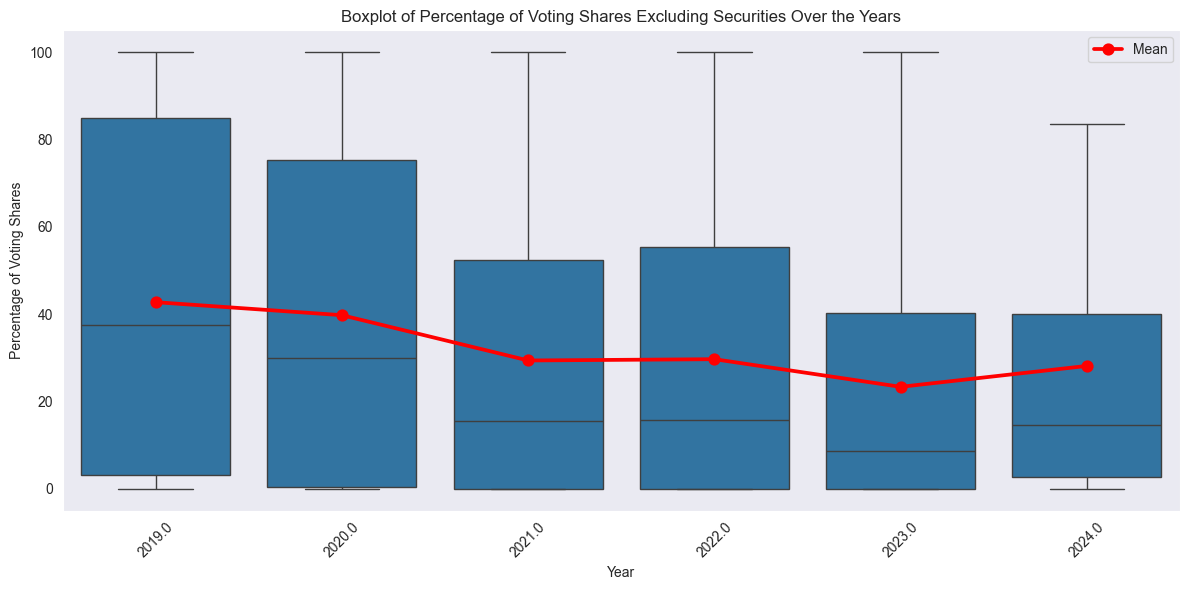

In [842]:
# Create a boxplot for each year
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='Total Percentage Sum', data=summed_df)

# Add the mean for each year
mean_values = summed_df.groupby('Year')['Total Percentage Sum'].mean().reset_index()
sns.pointplot(x='Year', y='Total Percentage Sum', data=mean_values, color='red', markers='o', label='Mean', errorbar=None)
plt.legend()
plt.xticks(rotation=45)


plt.title('Boxplot of Percentage of Voting Shares Excluding Securities Over the Years')
plt.xlabel('Year')
plt.ylabel('Percentage of Voting Shares')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

##### _*Note that the boxplot will look strange for 2024 as we have little data from that year_

In [843]:
max_values

Year
2019.0    100.00
2020.0    100.00
2021.0    100.00
2022.0    100.00
2023.0    100.00
2024.0     83.57
Name: Percentage of Voting Shares in Bank Holding Company, dtype: float64

In [844]:
# Average the number of entries for each group
average_entries = grouped.size().reset_index(name='Count')
average_entries['Year'] = average_entries['Year'].astype(int)

# Make a fourth column that is the bank name and year combined
average_entries['Bank_Year'] = average_entries['Bank Name'] + ' - ' + average_entries['Year'].astype(str)

In [845]:
average_entries

,Bank Name,Year,Count,Bank_Year
0,1867 Western Financial Corporation,2021,49,1867 Western Financial Corporation - 2021
1,1889 Bancorp Mutual Holding Company,2021,11,1889 Bancorp Mutual Holding Company - 2021
2,1889 Bancorp Mutual Holding Company,2022,12,1889 Bancorp Mutual Holding Company - 2022
3,"1889 Bancshares, Inc.",2019,12,"1889 Bancshares, Inc. - 2019"
4,1ST CAPITAL BANCORP,2021,16,1ST CAPITAL BANCORP - 2021
...,...,...,...,...
2835,"Virginia Community Capital, Inc.",2020,2,"Virginia Community Capital, Inc. - 2020"
2836,"Volunteer State Bancshares, Inc",2021,14,"Volunteer State Bancshares, Inc - 2021"
2837,"Volunteer State Bancshares, Inc.",2020,7,"Volunteer State Bancshares, Inc. - 2020"
2838,"Volunteer State Bancshares, Inc.",2023,2,"Volunteer State Bancshares, Inc. - 2023"


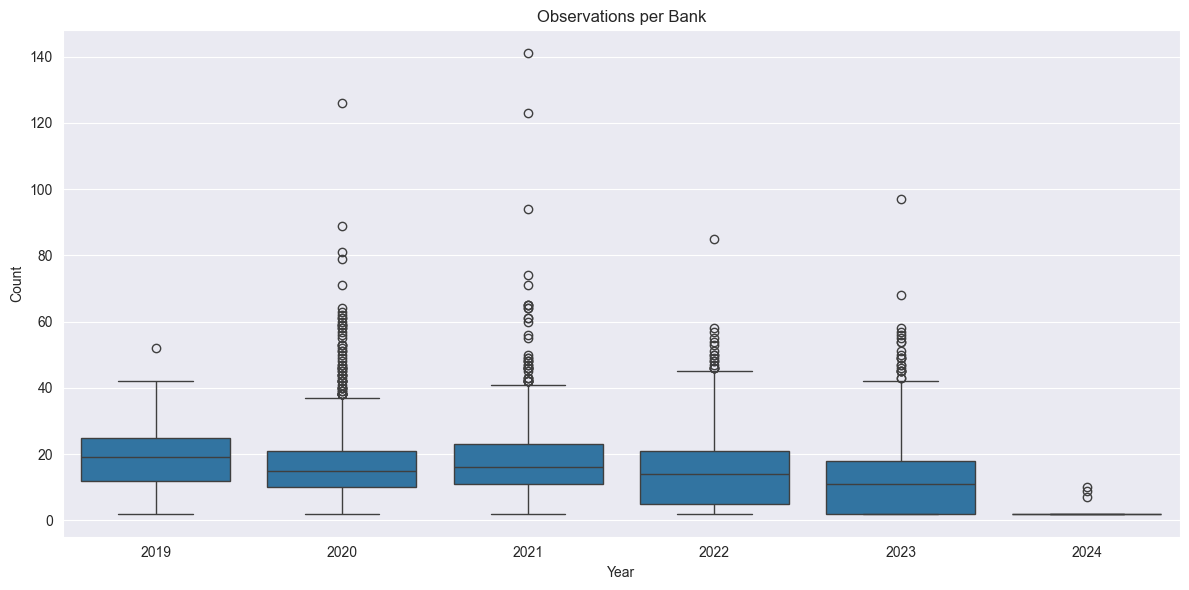

In [846]:
# Create a boxplot for the count variable
plt.figure(figsize=(12, 6))
sns.boxplot(y=average_entries['Count'], x=average_entries['Year'])
plt.title("Observations per Bank")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [847]:
# For each bank, find the percentage of voting shares held by the ceo ('CEO', 'executive director', chief, executive officer', 'president')
ceo_titles = [
    'CEO', 'Chief Executive Officer', 'President', 'Executive Director'
]
# Filter the DataFrame for rows where the title contains any of the ceo_titles
ceo_df = df[df['Title and Position with Bank Holding Company'].str.contains('|'.join(ceo_titles), case=False, na=False)]

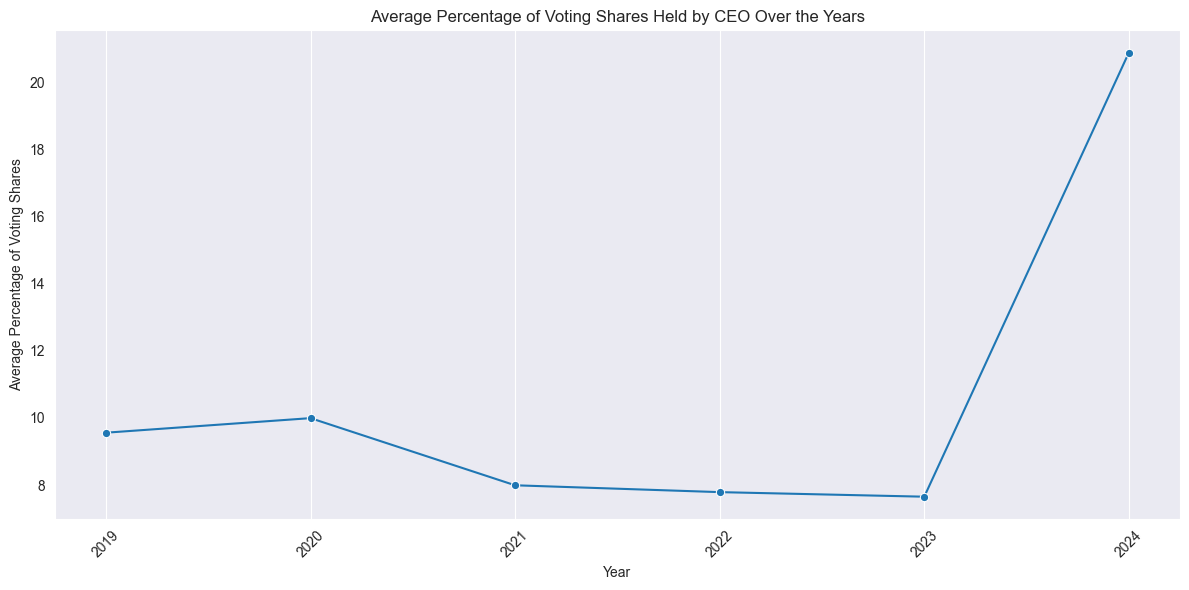

In [848]:
# Create a line plot for the average percentage of voting shares held by the ceo over the years
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year',
             y='Percentage of Voting Shares in Bank Holding Company',
             data=ceo_df.groupby('Year')['Percentage of Voting Shares in Bank Holding Company'].mean().reset_index(),
             marker='o')
plt.title('Average Percentage of Voting Shares Held by CEO Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Percentage of Voting Shares')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [849]:
# Add a column for the total percentage of voting shares held by the ceo in the bank holding company reported
def get_ceo_percentage(row):
    if pd.isna(row['Percentage of Voting Shares in Bank Holding Company']):
        return 0.0
    return row['Percentage of Voting Shares in Bank Holding Company']

ceo_df = ceo_df.copy()
ceo_df['Total Percentage of Voting Shares Held by CEO'] = ceo_df.apply(get_ceo_percentage, axis=1)

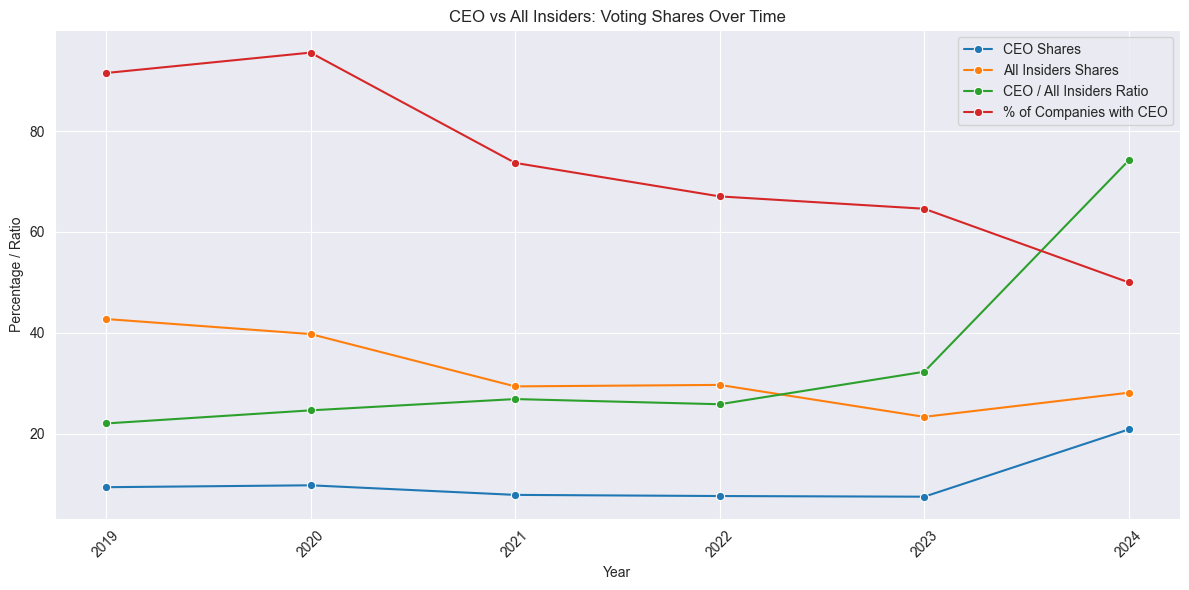

In [850]:
# Step 1: Group by year
ceo_by_year = ceo_df.groupby('Year')['Total Percentage of Voting Shares Held by CEO'].mean().reset_index()
insiders_by_year = summed_df.groupby('Year')['Total Percentage Sum'].mean().reset_index()

# Step 2: Merge the two for ratio calculation
merged = pd.merge(ceo_by_year, insiders_by_year, on='Year', how='inner')

# Step 3: Calculate CEO / Insider share ratio
merged['CEO to Insider Share Ratio'] = (
    merged['Total Percentage of Voting Shares Held by CEO'] /
    merged['Total Percentage Sum']
)

# NEW: Calculate percentage of companies that have a CEO by year
companies_with_ceo = ceo_df.groupby('Year')['Bank Name'].nunique()
total_companies = summed_df.groupby('Year')['Bank Name'].nunique()
percent_with_ceo = (companies_with_ceo / total_companies * 100).reset_index()
percent_with_ceo.columns = ['Year', 'Percent of Companies with CEO']
merged["CEO to Insider Share Ratio"] *= 100


# Step 4: Plot all five lines
plt.figure(figsize=(12, 6))

# CEO Shares
sns.lineplot(
    x='Year',
    y='Total Percentage of Voting Shares Held by CEO',
    data=ceo_by_year,
    marker='o',
    label='CEO Shares'
)

# All Insider Shares
sns.lineplot(
    x='Year',
    y='Total Percentage Sum',
    data=insiders_by_year,
    marker='o',
    label='All Insiders Shares'
)

# CEO / Insider Ratio
sns.lineplot(
    x='Year',
    y='CEO to Insider Share Ratio',
    data=merged,
    marker='o',
    label='CEO / All Insiders Ratio'
)

# Percent of Companies with CEO
sns.lineplot(
    x='Year',
    y='Percent of Companies with CEO',
    data=percent_with_ceo,
    marker='o',
    label='% of Companies with CEO'
)

# Formatting
plt.title('CEO vs All Insiders: Voting Shares Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage / Ratio')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.legend()
plt.tight_layout()
plt.show()


In [870]:
#print all rows in df where table presence is 'securities'
securities_rows = df[df['table presence'] == 'both']

securities_rows

,Name and Address,Principal occupation if other than with Bank Holding Company,Title and Position with Bank Holding Company,Title and Position with Subsidiaries,Title and Position with Other Businesses,Percentage of Voting Shares in Bank Holding Company,Percentage of Voting Shares in Subsidiaries,List names of other companies if 25% or more of voting securities are held,Bank Name,table presence,Bank_PDF-Name,Year,Number and Percentage of Voting Stock
12,"Douglass M Eberhardt II Stockton, CA United St...",NaN,"President, CEO and Chairman","President, CEO and Chairman",Member San Joaquin County Busines Council,54.00,NaN,NaN,1867 Western Financial Corporation,both,1867 Western Financial Corporation_Y-6_2021-12...,2021.0,NaN
13,"Timothy J Hachman Stockton, CA United States",Timothy J Hachman Retired Attorney at Law,Director,"Director, Bank of Stockton","Timothy J. Hachman, Attorney at Law, Owner",11.00,NaN,"Timothy J Hachman, Attorney at Law, 100%",1867 Western Financial Corporation,both,1867 Western Financial Corporation_Y-6_2021-12...,2021.0,NaN
14,"Gregory Bensch Stockton, CA United States","Medical Doctor, Allergy Immunology Asthma Medi...",Director,"Director, Bank of Stockton",NaN,0.00,NaN,"Gregory Bensch MD, Inc 100% Bensch & Bensch Pr...",1867 Western Financial Corporation,both,1867 Western Financial Corporation_Y-6_2021-12...,2021.0,NaN
15,"Thomas H Shaffer Stockton, CA United States",NaN,Director,Director Bank of Stockton,NaN,24.00,NaN,NaN,1867 Western Financial Corporation,both,1867 Western Financial Corporation_Y-6_2021-12...,2021.0,NaN
16,"John F Dentoni Stockton, CA United States",NaN,Chief Financial Officer,Chief Financial Officer,NaN,16.00,NaN,NaN,1867 Western Financial Corporation,both,1867 Western Financial Corporation_Y-6_2021-12...,2021.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39931,"Robert SchwarzSilver Lake, KS",Certified FinancialPlanner,Director,NaN,NaN,1.47,NaN,{'Name': 'Cobier Capital Management Schwarz Br...,"Republic Bancorp, Inc",both,"Republic Bancorp, Inc._Y-6_2020-12-31_English_...",2020.0,NaN
39932,"Keith AndersonBelleville, KS",Bank Branch Manager,Secretary/Director,Senior Vice President,NaN,2.66,NaN,{'Name': 'Three Fires Cattle Co Jakutio inc. A...,"Republic Bancorp, Inc",both,"Republic Bancorp, Inc._Y-6_2020-12-31_English_...",2020.0,NaN
39933,"John CareyTopeka, KS",Contractor,Director,NaN,NaN,4.91,NaN,{'Name': 'Modern Home Sale Midwest Homes S & J...,"Republic Bancorp, Inc",both,"Republic Bancorp, Inc._Y-6_2020-12-31_English_...",2020.0,NaN
39934,"Clifton Padgett Junction City, KS",Retired,Director,NaN,NaN,3.00,NaN,"{'Name': 'None', 'Shares': '-', 'Percentage of...","Republic Bancorp, Inc",both,"Republic Bancorp, Inc._Y-6_2020-12-31_English_...",2020.0,NaN


/var/folders/f4/pcvc4xgx55n86dz254dy43jr0000gn/T/ipykernel_32733/917854789.py:5: DtypeWarning: Columns (13,14,15,16,17,18,19,21,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,41,42,43,44,45,47,48,49,50,51,52,53,54,55,56,58,59,60,61,63,64,65,66,67,68,69,71,72,73,74,75,76,79,80,81,82,83,85,86,88,89,90,91,93,94,95,96,97,98,99,100,101,103,104,105,106,108,109,110,111,112,113,114,115,116,117,119,122,123,124,125,126,127,128,129,130,131,132,134,135,136,137,138,140,141,143,144,145,147,148,149,150,152,155,156,157,158,159,161,162,164,165,167,170,171,172,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,200,201,202,203,204,205,206,208,209,210,211,212,213,214,215,217,219,220,225,226,227,228,230,231,232,233,234,237,238,239,242,243,244,245,246,247,248,249,251,255,256,257,258,261,262,264,265,266,267,268,269,270,271,272,273,274,275,277,278,279,280,281,282,283,284,285,286,287,288,290,291,292,293,294,295,296,297,298,299,300,301,302,304,305,306,307,308,30

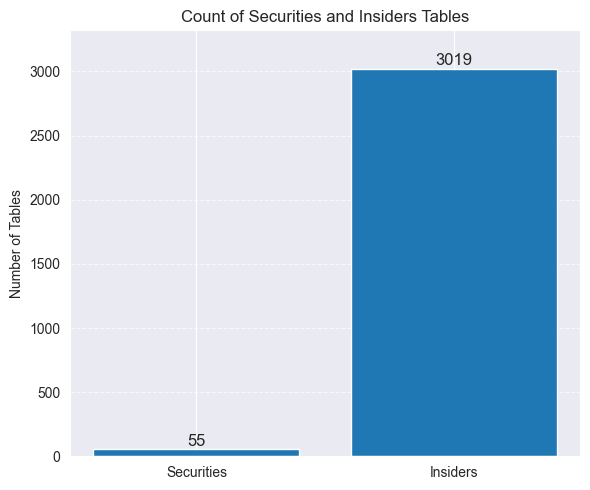

In [886]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV
table_df = pd.read_csv("all_insiders_combined.csv", dtype={'table presence': str})

# Normalize casing
table_df['table presence'] = table_df['table presence'].str.lower()

# Count the occurrences
securities_count = (table_df['table presence'] == 'securities').sum()
insiders_count = (table_df['table presence'] == 'insiders').sum()

# Prepare data for plotting
labels = ['Securities', 'Insiders']
counts = [securities_count, insiders_count]

# Create the bar chart
plt.figure(figsize=(6, 5))
bars = plt.bar(labels, counts)

# Annotate the bars with counts
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 5, str(height), ha='center', va='bottom', fontsize=12)

# Style the plot
plt.title('Count of Securities and Insiders Tables')
plt.ylabel('Number of Tables')
plt.ylim(0, max(counts) * 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [877]:
table_df

,Name and Address,Principal occupation if other than with Bank Holding Company,Title and Position with Bank Holding Company,Title and Position with Subsidiaries,Title and Position with Other Businesses,Percentage of Voting Shares in Bank Holding Company,Percentage of Voting Shares in Subsidiaries,List names of other companies if 25% or more of voting securities are held,Bank Name,table presence,...,Prioritized Bank,"FSC Holdings, Inc.",Prioritized Insurance Agency,"Title Services, Commercial Title Services, LLC",Holding Company Name,Occupation / Business Affiliation,Ownership of Subsidiaries,Holding Company Ownership,Ownership of Other Entities (Inning),Percentage of Voting Shares Voting in Subs.
0,"Douglass M Eberhardt II (1) Stockton, CA",NaN,"President, CEO and Chairman","President, CEO and Chairman",Member San Joaquin County Busines Council,19.99 %,NaN,NaN,Unknown,both,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Timothy J Hachman Stockton, CA",Retired Attorney at Law,Director,"Director, Bank of Stockton","Timothy J Hachman, Attorney at Law, Owner Dire...",0.11 %,NaN,"Timothy J Hachman, Attorney at Law, 100%",Unknown,both,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Gregory Bensch Stockton, Ca","Medical Doctor, Allergy Immunology Asthma Medi...",Director,"Director, Bank of Stockton",NaN,NaN,NaN,"Gregory Bensch MD, Inc 100% Bensch & Bensch Pr...",Unknown,both,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Thomas H Shaffer Stockton, CA",NaN,Director,Director Bank of Stockton,NaN,0.24 %,NaN,NaN,Unknown,both,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"John F. Denton Stockton, CA",NaN,Chief Financial Officer,Chief Financial Officer,NaN,0.16 %,NaN,NaN,Unknown,both,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39931,"Robert SchwarzSilver Lake, KS",Certified FinancialPlanner,Director,NaN,NaN,87.67 (1.47%),NaN,{'Name': 'Cobier Capital Management Schwarz Br...,"Republic Bancorp, Inc",both,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39932,"Keith AndersonBelleville, KS",Bank Branch Manager,Secretary/Director,Senior Vice President,NaN,158.07 (2.66%),NaN,{'Name': 'Three Fires Cattle Co Jakutio inc. A...,"Republic Bancorp, Inc",both,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39933,"John CareyTopeka, KS",Contractor,Director,NaN,NaN,292.23 (4.91%),NaN,{'Name': 'Modern Home Sale Midwest Homes S & J...,"Republic Bancorp, Inc",both,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39934,"Clifton Padgett Junction City, KS",Retired,Director,NaN,NaN,2.00 (.0003%),NaN,"{'Name': 'None', 'Shares': '-', 'Percentage of...","Republic Bancorp, Inc",both,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
